In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

# **Load and Explore the Dataset**


In [194]:
df = pd.read_csv(r"C:/Users/ganna/OneDrive/Desktop/student-por.csv")


In [196]:

print(df.shape)          # Rows and Columns

(649, 33)


In [198]:

print(df.columns)        # Column names


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [200]:

print(df.head())         # First 5 rows


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [202]:

# Check for missing values
print(df.isnull().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# **Data Splitting**

In [205]:
# Create the 'pass' target column 
# If the final grade G3 is 10 or more then pass = 1 otherwise pass=0
df['pass'] = df['G3'].apply(lambda grade: 1 if grade >= 10 else 0)
#when we did this the result is an unbalanced data class pass has more obs than class fail 
#another way we want to make it pass based on the sum og 3 groups g1 + g2 + g3 WHEN WE DID this also t
#data had too many outliers so we tried with col gpa 
#df['GPA'] =( df['G1'] + df['G2']+df['G3'])/3
#df.head() #to get the avg and set the threshold
#this is also has reduced the acc alot so we will come back to test with the first approach 


In [207]:

# Drop G1, G2, and G3 (grades) from features if you want to prevent leaking the answer
features = df.drop(columns=['G1', 'G2', 'G3', 'pass' ])
target = df['pass']


In [209]:

print("Features shape:", features.shape)
print("Target shape:", target.shape)


Features shape: (649, 30)
Target shape: (649,)


In [211]:
# Convert categorical variables into numeric variables
features_encoded = pd.get_dummies(features, drop_first=True)


In [213]:

print(features_encoded.shape)


(649, 39)


In [215]:

print(features_encoded.head())


   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [217]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,0.845917
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.361307
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,1.000000


In [219]:
# Use Random Forest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(features_encoded, df['pass'])
feature_importance = pd.DataFrame({'Feature': features_encoded.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select top 20 features (arbitrary threshold, can be tuned)
top_features = feature_importance['Feature'].head(20).values
features_selected = features_encoded[top_features]

print("Selected Features:\n", top_features)


Selected Features:
 ['failures' 'absences' 'school_MS' 'higher_yes' 'famrel' 'freetime'
 'goout' 'Walc' 'age' 'Fedu' 'health' 'Medu' 'traveltime' 'Dalc'
 'studytime' 'romantic_yes' 'sex_M' 'activities_yes' 'famsize_LE3'
 'address_U']


In [221]:
# Scale the selected features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_selected)
features_scaled = pd.DataFrame(features_scaled, columns=features_selected.columns)


In [223]:
# Data Splitting
# split into 60% training (to teach the KNN model)
# 40% temporary 
X_train, X_temp, y_train, y_temp = train_test_split(features_selected, target, test_size=0.4, random_state=42, stratify=target)

In [225]:
# 50% validation, 50% test from temp (20% each)
# 20% validation To choose the best K
# test 20% To test the final model
# stratify=target (Keeps pass/fail balance)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [227]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (389, 20) (389,)
Validation set: (130, 20) (130,)
Test set: (130, 20) (130,)


In [229]:
# Apply ADASYN to training data to address class imbalance
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print("Training set after ADASYN:", X_train_adasyn.shape, y_train_adasyn.shape)
print("Class distribution after ADASYN:\n", pd.Series(y_train_adasyn).value_counts())


Training set after ADASYN: (667, 20) (667,)
Class distribution after ADASYN:
 pass
0    338
1    329
Name: count, dtype: int64


# **K-Nearest Neighbors (KNN) Algorithm**

In [232]:
# Try different values of K
#Odd numbers are better to avoid ties in voting
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# for ever k we try check the accuracy and save it into the list then we can compare to find the best
validation_accuracies = []


In [234]:
for k in k_values:
    # Create KNN model 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit on training data
    knn.fit(X_train, y_train)
    
    # Predict on validation data
    y_val_pred = knn.predict(X_val)
    
    # Calculate accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)
    
    print(f"K = {k}, Validation Accuracy = {val_accuracy:.4f}")

K = 1, Validation Accuracy = 0.7769
K = 3, Validation Accuracy = 0.8308
K = 5, Validation Accuracy = 0.8231
K = 7, Validation Accuracy = 0.8308
K = 9, Validation Accuracy = 0.8385
K = 11, Validation Accuracy = 0.8462
K = 13, Validation Accuracy = 0.8385
K = 15, Validation Accuracy = 0.8385


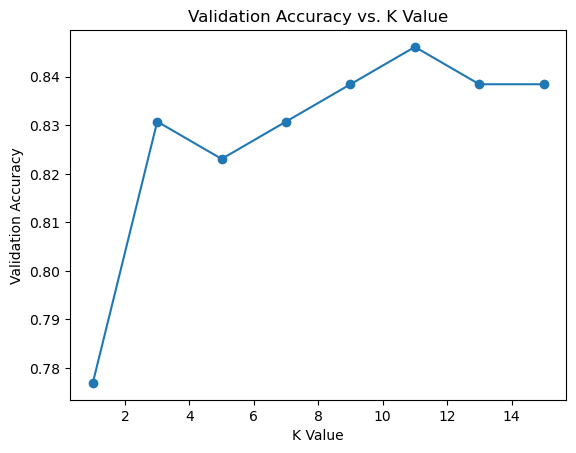

In [236]:
# Plot validation accuracies to choose best K
plt.plot(k_values, validation_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. K Value')
plt.show()


In [238]:
# Select the best K
best_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print(f"Best K: {best_k}")

Best K: 11


In [240]:
# Train final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [242]:
# Evaluate on training set
y_train_pred = knn_final.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.8586


In [244]:
# Evaluate on validation set
y_val_pred = knn_final.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.8462


In [246]:
# Evaluate on test set
y_pred = knn_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8385


# **Cross Validation**

In [249]:
from sklearn.model_selection import KFold , cross_val_score
import numpy as np


**Kfolds = 5 , w tried with 10 but the acc = 0.86 with best k = 5 but the final res from the test set approaches to 0.831 so k = 5 is more reialble**

In [252]:
#what i need to know
# 1- k_values to know the possible combinations  -> already done previously 
# 2- training set  , test set  , validation set -> already done previously
# 3- k_folds to train the cv on the training set 
# 4- report avg acc across folds 
# 5- comparing the cv scores , validation acc  , test set results 

kf = KFold(n_splits=5, shuffle=True , random_state=42)
cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    #replacing the manual validations by cross validation scores 
    #score -> returns an array contains the acc for each k value using cv 
    scores = cross_val_score(
        estimator=knn,
        X= X_train,
        y= y_train,
        cv=kf ,
        scoring='accuracy'
    )
    print(scores)

    avg_accuracy = np.mean(scores)
    cv_accuracies.append(avg_accuracy)


#how to get the best k ? using the max avg_acc through the cv_accuracies 
best_k_cv = k_values[np.argmax(cv_accuracies)]
print(f'the best k value:{best_k_cv} and its acc = { max(cv_accuracies):.3f}')




[0.83333333 0.79487179 0.83333333 0.85897436 0.77922078]
[0.87179487 0.82051282 0.87179487 0.8974359  0.79220779]
[0.88461538 0.84615385 0.84615385 0.8974359  0.81818182]
[0.88461538 0.84615385 0.82051282 0.8974359  0.79220779]
[0.88461538 0.82051282 0.82051282 0.8974359  0.79220779]
[0.8974359  0.82051282 0.83333333 0.88461538 0.79220779]
[0.8974359  0.82051282 0.83333333 0.88461538 0.79220779]
[0.8974359  0.82051282 0.83333333 0.88461538 0.79220779]
the best k value:5 and its acc = 0.859


**relationship between  k values and cv_accuracies**

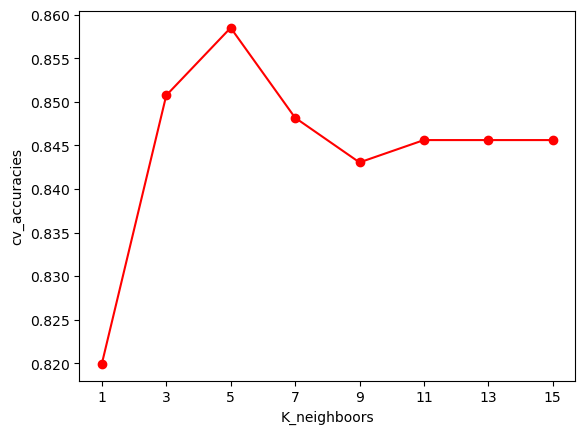

In [255]:
plt.plot(k_values  , cv_accuracies ,color='red' , marker = 'o')
plt.xlabel('K_neighboors')
plt.ylabel('cv_accuracies')
plt.xticks(k_values)
plt.show()

**testing the best k through the holdout test set**

**comparing the results between** 
###### **1-cross validation** 
###### **2-validation set**
###### **3-test set**

In [259]:
#max validation acc = 0.853 , k = 11
#max cv acc = 0.855  , k = 7 more reliable 
#test set results -> weather the cv better or the single val set is better means final evaluation
#train on all untest data 
x_train_val = pd.concat([X_train , X_val] , axis=0 )
y_train_val = pd.concat([y_train , y_val] , axis = 0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_val_s = scaler.fit_transform(x_train_val)
X_test_s = scaler.transform(X_test)

#final model
final_knn = KNeighborsClassifier(n_neighbors= best_k_cv)   
final_knn.fit(x_train_val_s , y_train_val)
test_acc  = final_knn.score(X_test_s , y_test)
print(f'the final test acc :{test_acc:.3f}')

the final test acc :0.831


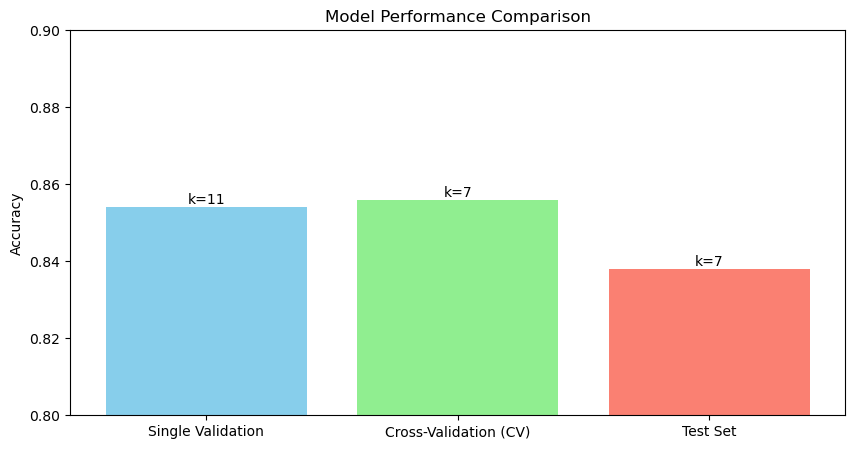

In [261]:

methods = ['Single Validation', 'Cross-Validation (CV)', 'Test Set']
accuracies = [0.854,0.856, 0.838]  
best_ks = [11, 7, 7]  # Best k for each method

fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot for accuracies
bars = ax.bar(methods, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
ax.set_ylabel('Accuracy')
ax.set_ylim(0.80, 0.90)  #the acc range 
ax.set_title('Model Performance Comparison')

# Annotate best k on each bar
for bar, k in zip(bars, best_ks):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'k={k}', ha='center', va='bottom')

plt.show()

# **Discussion**                                                                                          
now the cv is more realistic as it performs on all the splits and the results show that the both validation set and cv are estimate to the test result slightly optimistic   , but the validation is less realistic beacause it comes from one split may this split by luck gives me this acc and another split gives less so i think cv was really a good choice because it indicates the performance whenever the split was and it has a low variance with the final test acc where var = |0.838 - 0.856| =0.018
means low variance

# **Confusion Matrix**

In [265]:
# now the final selected model is knn with k = 7 and test acc = 0.838
from sklearn.metrics import classification_report , confusion_matrix 
#final model = final_knn and start to get the y_pred 

y_pred = final_knn.predict(X_test_s)



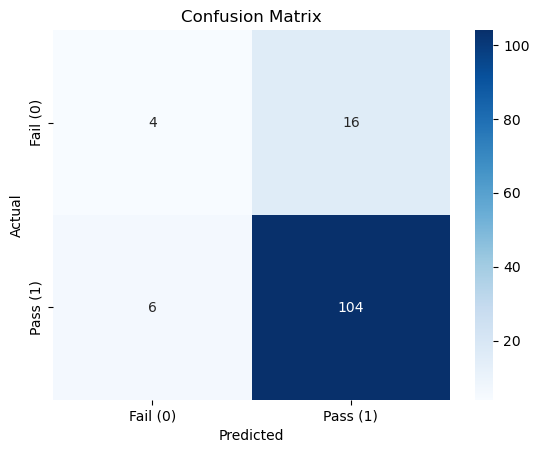

In [267]:
import seaborn as sns 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fail (0)', 'Pass (1)'], 
            yticklabels=['Fail (0)', 'Pass (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [269]:
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))

              precision    recall  f1-score   support

        Fail       0.40      0.20      0.27        20
        Pass       0.87      0.95      0.90       110

    accuracy                           0.83       130
   macro avg       0.63      0.57      0.59       130
weighted avg       0.79      0.83      0.81       130



In [271]:
print("Class Distribution (Test Set):\n", y_test.value_counts())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Class Distribution (Test Set):
 pass
1    110
0     20
Name: count, dtype: int64

Confusion Matrix:
 [[  4  16]
 [  6 104]]


**Key insights**

about the class **Fail(0)** it has a too low recal means that the model misses about 90% of the students who where failed 
and the percesion means that the model predict fail 40% correct of the time = 60 % wrong
all this problems may be because data class inbalance the  number of class pass is much more big than class fail this what is why the model predicts about class fails false -> we need to adjust cross validation method or the threshold of the pass col based on G3 

about class **pass(1)** it has a too high recall means that the model misses only 10 % of students who where passed 
and the percesion is moderate , slightly high means that the model predict pass correct 86% of the time 